In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
file_path = '/Users/thomas/Desktop/hall_sensor_2024-07-11_00-38-51.csv'
file_path2 = '/Users/thomas/Desktop/hall_sensor_2024-07-11_04-31-40.csv'

# Import hall data
df1 = pd.read_csv(file_path)
df1['time'] = df1['time'].apply(lambda x: int(x))
df1 = df1[['time']]
df1['sensor'] = 'Hall'
df3 = pd.read_csv(file_path2)
df3['time'] = df3['time'].apply(lambda x: int(x))
df3 = df3[['time']]
df3['sensor'] = 'Hall'

# Import omega data
df2 = pd.read_csv(file_path.replace('hall','omega'))
df2['time'] = df2['time'].apply(lambda x: int(x))
df2 = df2[['time']]
df2['sensor'] = 'Omega'
df4 = pd.read_csv(file_path2.replace('hall','omega'))
df4['time'] = df4['time'].apply(lambda x: int(x))
df4 = df4[['time']]
df4['sensor'] = 'Omega'

# Add time in minutes relative to first tick
first_tick = min(df1.time[0]/1e9/60, df2.time[0]/1e9/60)
df1['time_min'] = df1['time']/1e9/60 - first_tick
df3['time_min'] = df3['time']/1e9/60 - first_tick
df2['time_min'] = df2['time']/1e9/60 - first_tick
df4['time_min'] = df4['time']/1e9/60 - first_tick

# Remove long break period between 1&2 and 3&4
break_time = list(df3.time_min)[0] - list(df1.time_min)[-1]
df3['time_min'] = df3['time_min'] - break_time
df4['time_min'] = df4['time_min'] - break_time

# Create the hall dataframes
df_hall = pd.concat([df1, df3], ignore_index=True)
df_hall = df_hall.sort_values(by='time')
df_hall = df_hall.reset_index(drop=True)
df_hall['hall_frequency'] = 1 / (df_hall['time'].diff().shift(-1)) * 1e9

# Create the omega dataframe
df_omega = pd.concat([df2, df4], ignore_index=True)
df_omega = df_omega.sort_values(by='time')
df_omega = df_omega.reset_index(drop=True)
df_omega['omega_frequency'] = 1 / (df_omega['time'].diff().shift(-1)) * 1e9

# Merge the hall and omega dataframes
df = pd.concat([df_hall, df_omega], ignore_index=True)
df = df.sort_values(by='time')
df = df.reset_index(drop=True)

# Fill in NaN values
df['hall_frequency'].fillna(method='ffill', inplace=True)
df['omega_frequency'].fillna(method='ffill', inplace=True)

display(df)

/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_10162/2819823738.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hall_frequency'].fillna(method='ffill', inplace=True)
/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_10162/2819823738.py:54: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['hall_frequency'].fillna(method='ffill', inplace=True)
/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_10162/2819

,time,sensor,time_min,hall_frequency,omega_frequency
0,1609468153558211000,Omega,0.000000,NaN,0.029901
1,1609468155866447000,Hall,0.038471,33.788350,0.029901
2,1609468155896043000,Hall,0.038964,33.443698,0.029901
3,1609468155925944000,Hall,0.039462,33.700671,0.029901
4,1609468155955617000,Hall,0.039957,33.670034,0.029901
...,...,...,...,...,...
986279,1609492993640664000,Hall,304.998102,33.109294,0.054787
986280,1609492993670867000,Hall,304.998606,33.519928,0.054787
986281,1609492993700700000,Hall,304.999103,33.199429,0.054787
986282,1609492993730821000,Hall,304.999605,32.998944,0.054787


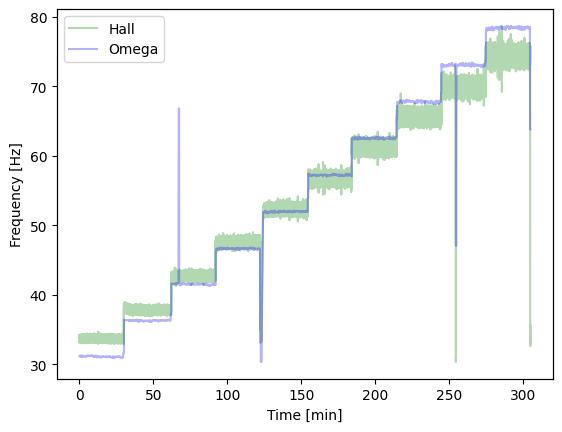

In [20]:
# Filter out errors
df = df[df.omega_frequency<0.1]
df = df[df.omega_frequency>0.01]
df = df[df.hall_frequency>30]

# Plot results
fig, ax = plt.subplots(1,1)
ax2 = ax.twinx()
ax.plot(list(df.time_min), list(df.hall_frequency), alpha=0.3, label=f'Hall', color='green')
ax2.plot(list(df.time_min), list(df.omega_frequency), alpha=0.3, label=f'Omega', color='blue')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [min]')
#ax.set_yticks([])
ax2.set_yticks([])
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2)
plt.show()

*************************
Distribution pump: 30
*************************
Gallons during the section: 53
Gallons per tick: 0.0009030961
Average GPM: 1.767
*************************
Distribution pump: 35
*************************
Gallons during the section: 53
Gallons per tick: 0.0009116868
Average GPM: 2.038
*************************
Distribution pump: 40
*************************
Gallons during the section: 59
Gallons per tick: 0.000906298
Average GPM: 2.269
*************************
Distribution pump: 45
*************************
Gallons during the section: 65
Gallons per tick: 0.0008916935
Average GPM: 2.5
*************************
Distribution pump: 50
*************************
Gallons during the section: 71
Gallons per tick: 0.0008888221
Average GPM: 2.731
*************************
Distribution pump: 55
*************************
Gallons during the section: 72
Gallons per tick: 0.0008916298
Average GPM: 2.769
*************************
Distribution pump: 60
*************************

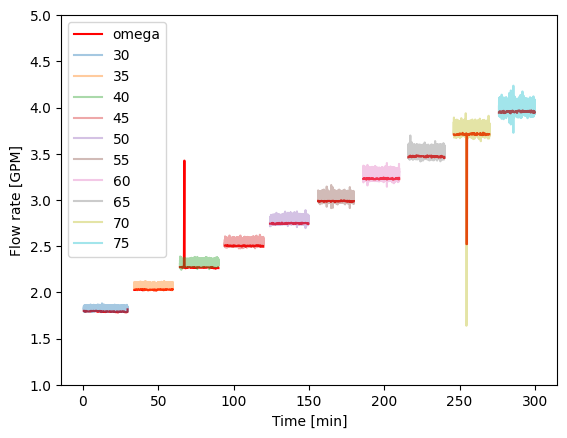

In [21]:
df_backup = df

for section in range(10):
    
    # Get the full data back
    df = df_backup

    # Crop the data to the desired section
    min_time = section*30
    max_time = (section+1)*30
    min_time = min_time+4 if min_time>=30 else min_time
    min_time = min_time+2 if min_time>=150 else min_time
    print('*'*25 + f'\nDistribution pump: {30+section*5}\n' + '*'*25)
    df = df[df.time_min>=min_time]
    df = df[df.time_min<=max_time]

    # Crop between the first and last Omega ticks
    first_omega_tick = list(df[df.sensor=='Omega'].time)[0]
    last_omega_tick = list(df[df.sensor=='Omega'].time)[-1]
    df = df[df.time>=first_omega_tick]
    df = df[df.time<=last_omega_tick]

    # Count the gallons per tick
    gallons = len(df[df.sensor=='Omega'])
    print(f'Gallons during the section: {round(gallons,1)}')
    hall_gallons_per_tick = gallons / len(df[df.sensor=='Hall'])
    print(f'Gallons per tick: {round(hall_gallons_per_tick,10)}')
    average = gallons/30 if min_time<30 else gallons/26
    print(f'Average GPM: {round(average,3)}')

    # Compute GPM
    df['hall_GPM'] = df['hall_frequency'] * hall_gallons_per_tick * 60
    df['omega_GPM'] = df['omega_frequency'] * 1 * 60
    
    # Plot results
    if section==0:
        plt.plot(list(df.time_min), list(df.omega_GPM), alpha=1, color='red', label='omega')
    else:
        plt.plot(list(df.time_min), list(df.omega_GPM), alpha=1, color='red')
    plt.plot(list(df.time_min), list(df.hall_GPM), alpha=0.4, label=f'{30+section*5}')
    plt.ylabel('Flow rate [GPM]')
    plt.xlabel('Time [min]')
    plt.ylim([1,5])
    plt.legend()

plt.savefig('plot.png', dpi=200)
plt.show()